In [108]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [109]:
#reading the data set named as train
train_df=pd.read_csv("aug_train.csv",header=0)

In [110]:
#reading the data set named as test
test_df=pd.read_csv("aug_test.csv",header=0)

In [111]:
# Checking the shape of the data
train_df.shape

(19158, 14)

In [112]:
test_df.shape

(2129, 13)

In [113]:
train_df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
13149,28674,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,>20,50-99,Pvt Ltd,>4,33,1.0
3469,18303,city_21,0.624,NaN,No relevent experience,no_enrollment,Graduate,STEM,3,NaN,NaN,NaN,22,1.0
16220,17961,city_149,0.689,NaN,Has relevent experience,NaN,Graduate,STEM,6,50-99,Pvt Ltd,2,86,0.0
16990,29912,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Other,5,<10,Pvt Ltd,1,214,0.0
4671,17431,city_71,0.884,NaN,Has relevent experience,Full time course,Graduate,STEM,8,NaN,NaN,NaN,39,0.0


In [114]:
test_df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
817,675,city_103,0.920,NaN,Has relevent experience,Full time course,Graduate,STEM,>20,NaN,Pvt Ltd,>4,50
695,853,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,2,11
1804,31236,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,NaN,Pvt Ltd,2,43
668,22625,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,100-500,Public Sector,2,79
1994,875,city_160,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,12,<10,Pvt Ltd,1,70


In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [117]:
train_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [118]:
test_df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [119]:
train_df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [120]:
test_df.nunique()

enrollee_id               2129
city                       108
city_development_index      81
gender                       3
relevent_experience          2
enrolled_university          3
education_level              5
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             223
dtype: int64

# Data Cleaning

In [121]:
#total number of missing value in a table of each column

train_df.isnull().sum() 

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [122]:
test_df.isnull().sum() 

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [123]:
# printing total number of duplicate values
train_df.duplicated().sum()

0

In [124]:
# printing total number of duplicate values
test_df.duplicated().sum()

0

In [125]:
# printing total number of duplicate values
train_df.duplicated().sum()

0

In [126]:
# printing total number of duplicate values
test_df.duplicated().sum()

0

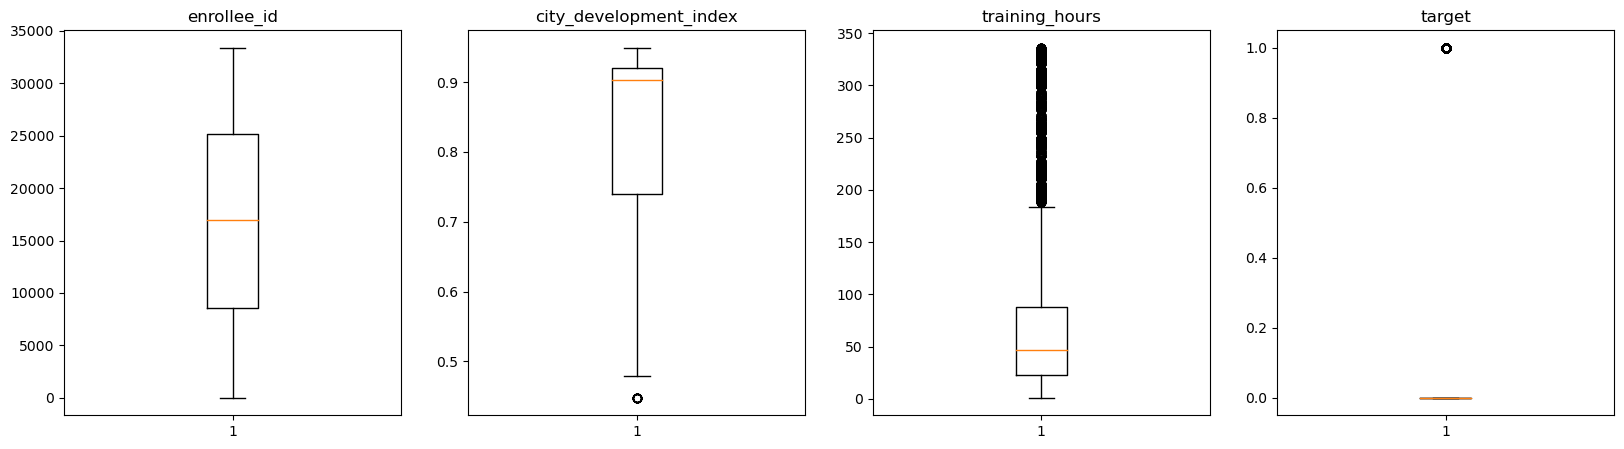

In [127]:
import matplotlib.pyplot as plt

# Select only the numerical columns from the dataframe
num_cols = train_df.select_dtypes(include=['float64', 'int64'])

# Create a boxplot for each numerical column
fig, axes = plt.subplots(nrows=1, ncols=num_cols.shape[1], figsize=(20, 5))
for i, column in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[column])
    axes[i].set_title(column)

plt.show()


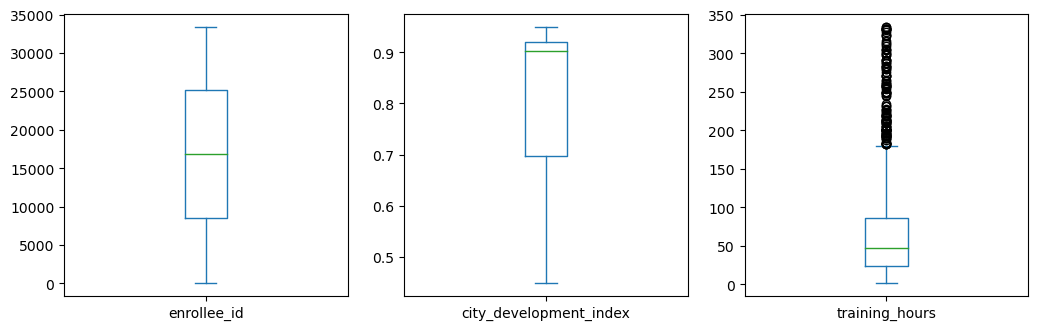

In [128]:
#to plot the outliers for test data
import matplotlib.pyplot as plt
test_df.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()

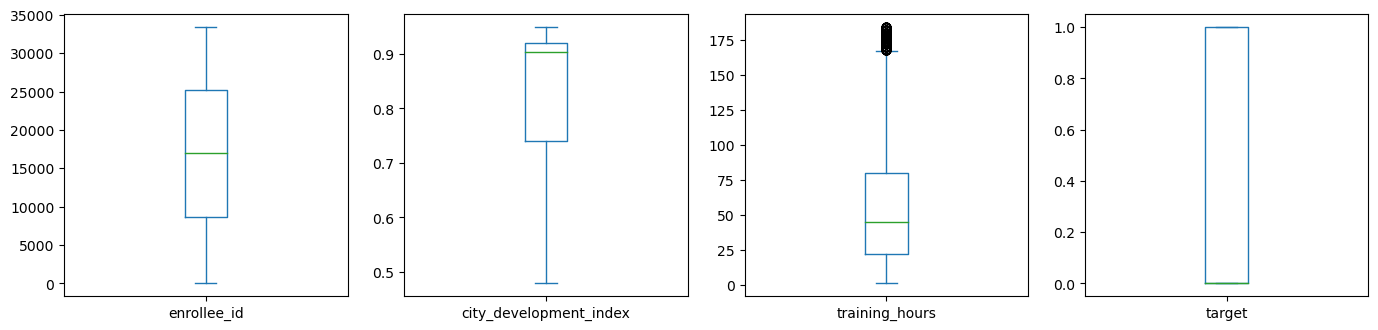

In [129]:
###After removing Outliers
cols = ["training_hours","city_development_index"]

Q1 = train_df[cols].quantile(0.25)
Q3 = train_df[cols].quantile(0.75)

IQR = Q3 - Q1

train_df_box = train_df[~((train_df[cols] < (Q1 - 1.5 * IQR)) |(train_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
train_df_box.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()

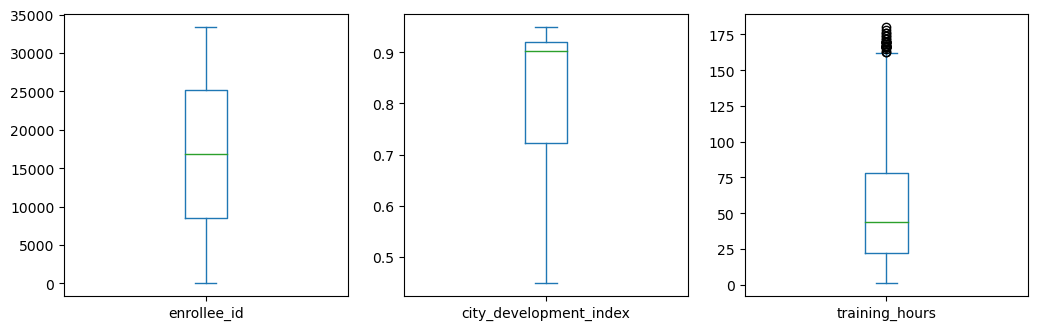

In [130]:
###After removing Outliers
cols = ["training_hours"]

Q1 = test_df[cols].quantile(0.25)
Q3 = test_df[cols].quantile(0.75)

IQR = Q3 - Q1

test_df_box = test_df[~((test_df[cols] < (Q1 - 1.5 * IQR)) |(test_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
test_df_box.plot(kind='box',subplots=True,layout=(7,7),figsize=(30,30))
plt.show()

In [131]:
# List of columns to impute categorical missing values
cols_to_impute = ['gender', 'enrolled_university', 'education_level','major_discipline','experience','company_size','company_type','last_new_job']

# Impute missing values with mode
for col in cols_to_impute:
    mode_col = train_df[col].mode()[0]
    train_df[col].fillna(mode_col, inplace=True)


In [132]:
# List of columns to impute categorical missing values
cols_to_impute = ['gender', 'enrolled_university', 'education_level','major_discipline','experience','company_size','company_type','last_new_job']

# Impute missing values with mode
for col in cols_to_impute:
    mode_col = test_df[col].mode()[0]
    test_df[col].fillna(mode_col, inplace=True)


In [133]:
# missing value treatment using median
median_bmi = train_df['training_hours'].median()
train_df['training_hours'] = train_df['training_hours'].fillna(median_bmi)

In [134]:
# missing value treatment using median
median_bmi = test_df['training_hours'].median()
test_df['training_hours'] = test_df['training_hours'].fillna(median_bmi)

In [135]:
train_df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [136]:
test_df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [137]:
# converting the "target" feature into int 
train_df['target'] = train_df['target'].astype(int)


In [138]:
train_df['target'].dtype

dtype('int32')

In [139]:
# converting categorical data into numerical in training data
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['city', 'gender', 'relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    label = LabelEncoder()
    train_df[col] = label.fit_transform(train_df[col])


In [140]:
train_df.shape

(19158, 14)

In [141]:
# converting categorical data into numerical in testing data
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
cat_cols = ['city', 'gender', 'relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    label = LabelEncoder()
    test_df[col] = label.fit_transform(test_df[col])


In [142]:
test_df.shape

(2129, 13)

<AxesSubplot:>

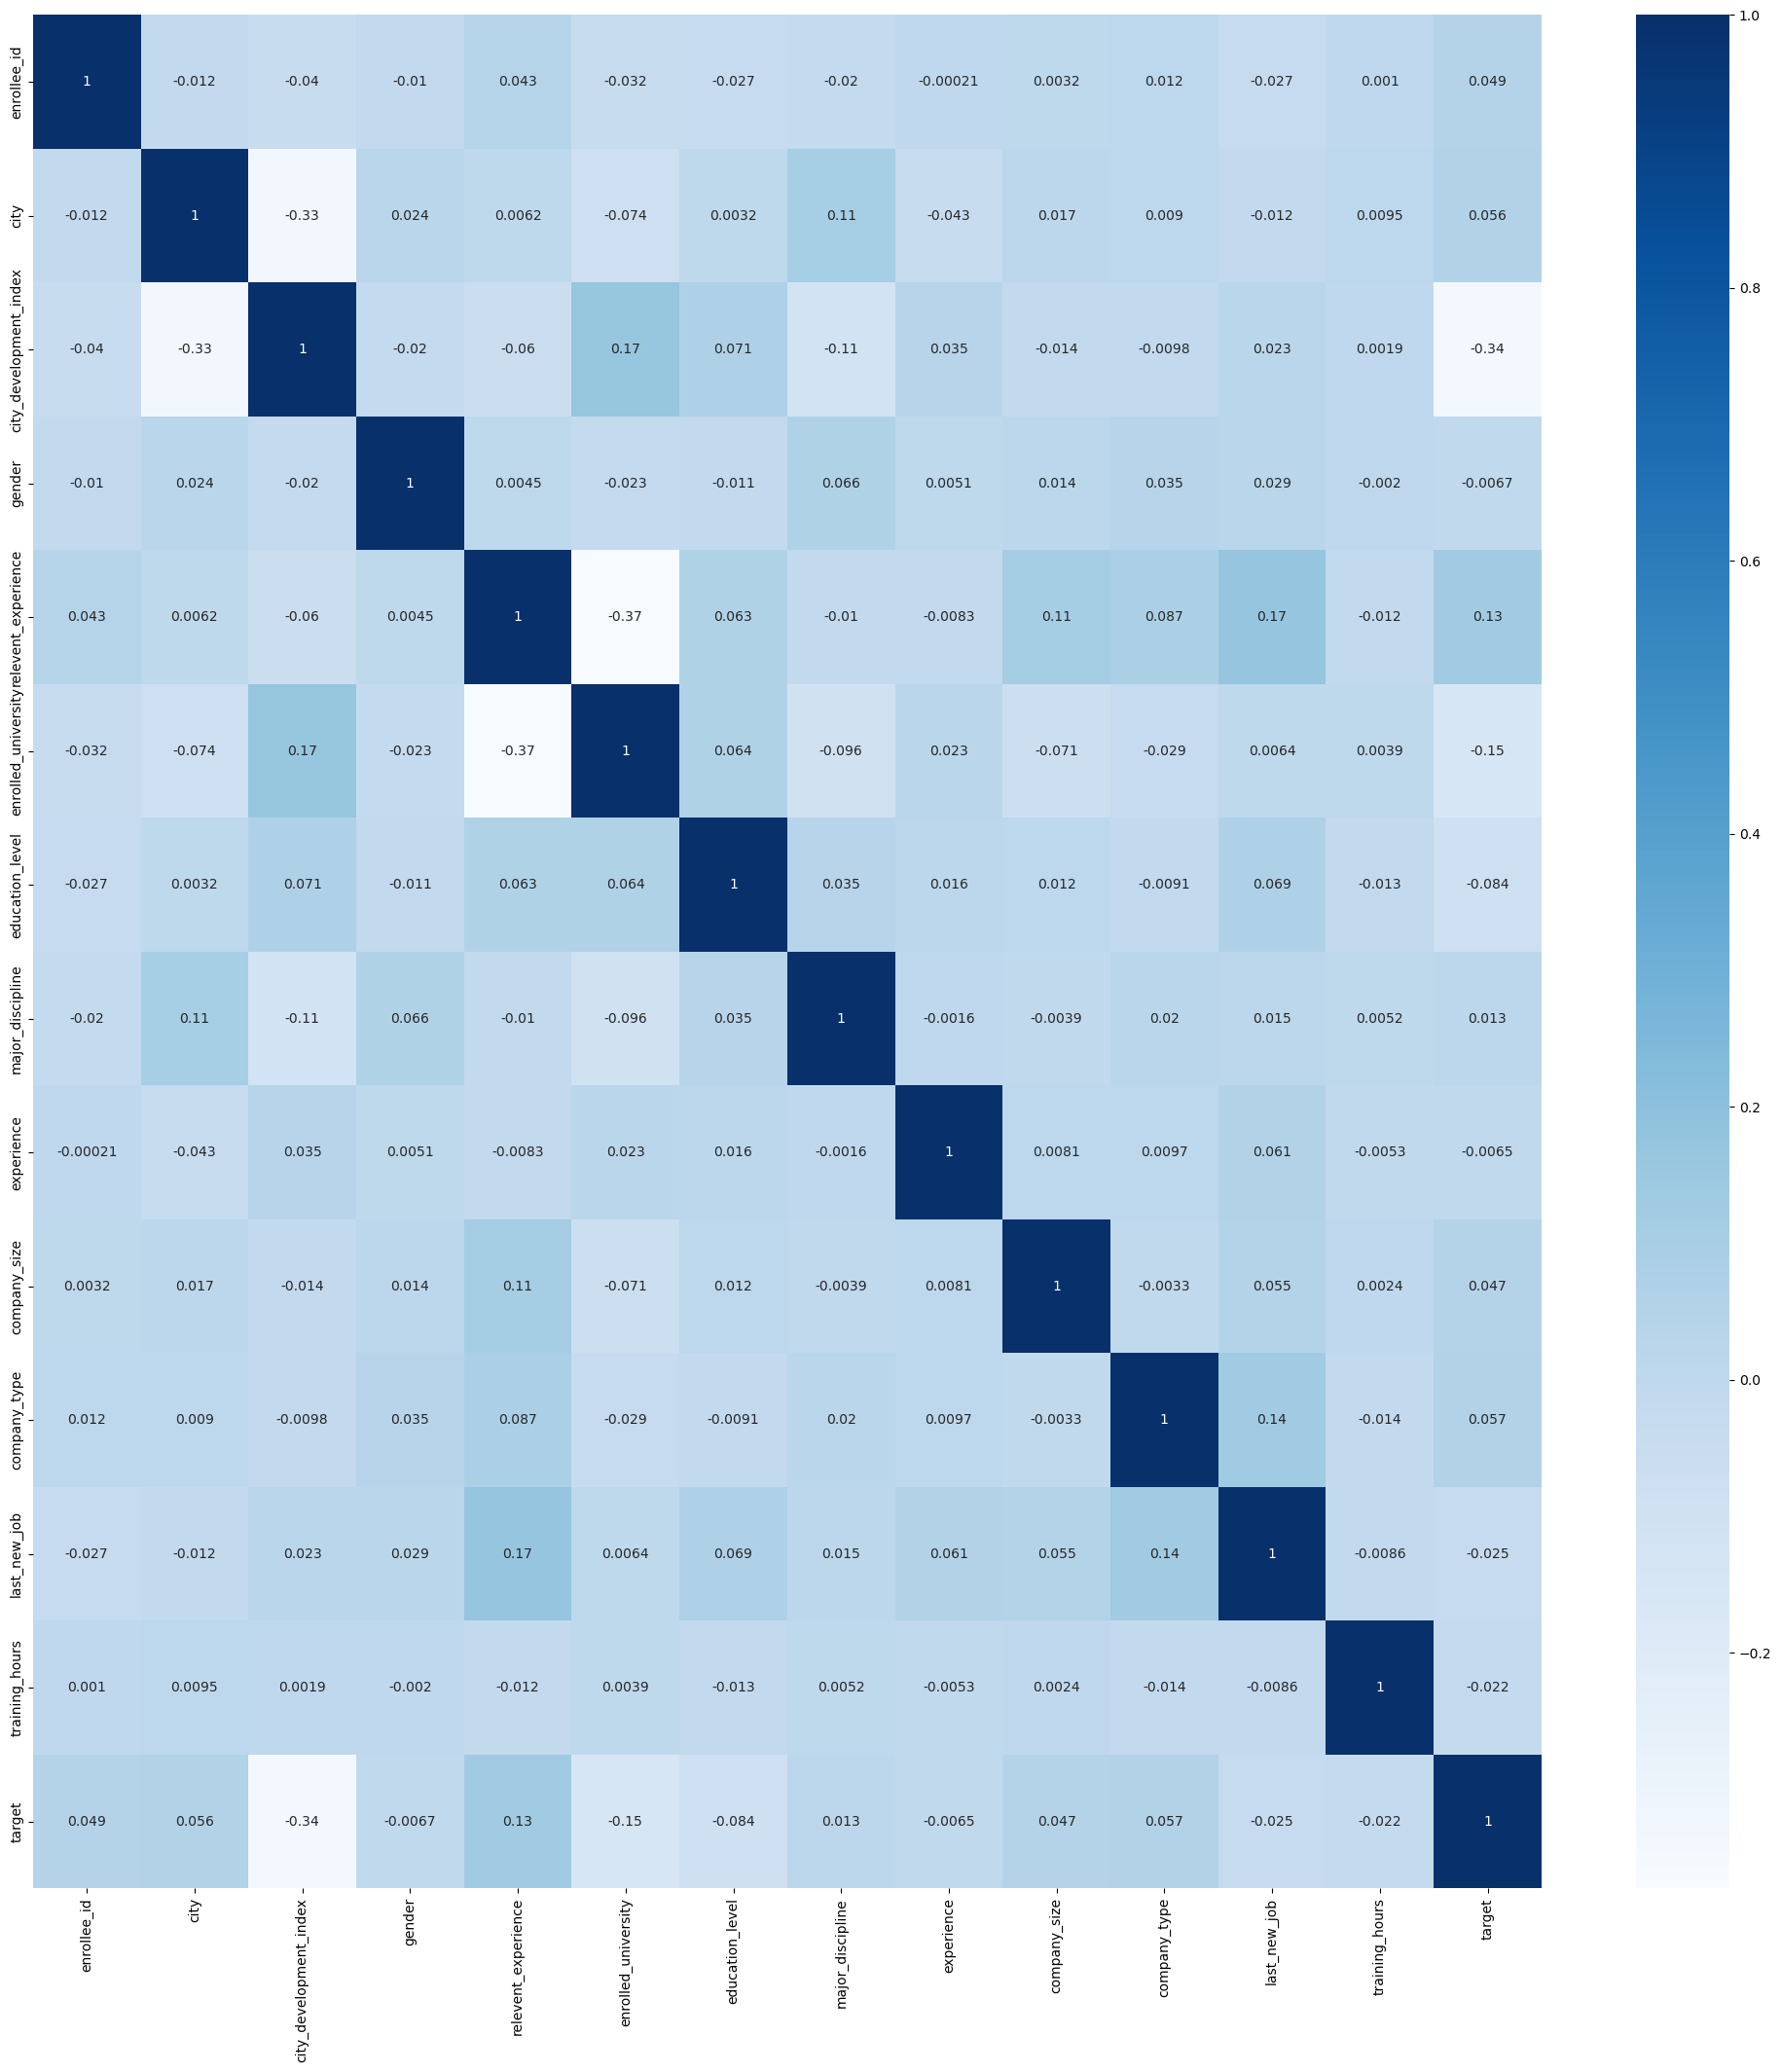

In [143]:
# 2D Correlation heatmap matrix
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(),cbar=True,annot=True,cmap='Blues')

In [144]:
# Define target variable and list of features
target_var = "target"
features = train_df.select_dtypes(include='number').columns.tolist()
features.remove(target_var)

# Set correlation threshold
corr_threshold = 0.1

# Drop features with low correlation
for feature in features:
    corr = train_df[feature].corr(train_df[target_var])
    if abs(corr) < corr_threshold:
        train_df = train_df.drop(columns=[feature])
        print(f"Dropped column {feature} due to low correlation with target variable.")

Dropped column enrollee_id due to low correlation with target variable.
Dropped column city due to low correlation with target variable.
Dropped column gender due to low correlation with target variable.
Dropped column education_level due to low correlation with target variable.
Dropped column major_discipline due to low correlation with target variable.
Dropped column experience due to low correlation with target variable.
Dropped column company_size due to low correlation with target variable.
Dropped column company_type due to low correlation with target variable.
Dropped column last_new_job due to low correlation with target variable.
Dropped column training_hours due to low correlation with target variable.


# Model Building without sklearn

In [145]:
# separating input from output
xtrain=train_df.drop(["target"],axis=1)
xtrain.shape

(19158, 3)

In [146]:
ytrain=train_df["target"]
ytrain.shape

(19158,)

In [147]:
# Importing the train test split to split the datase

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain,test_size=0.20,random_state=20)

In [148]:
y_train = np.array(y_train).reshape((-1, 1))

In [149]:
# Feature Scaling

# Importing the standardscaler package for standardization
from sklearn.preprocessing import StandardScaler

# Applying the standardscaler to training data
sc = StandardScaler().fit(X_train)

In [150]:
# Transforming the training data into standard

X_train_std = sc.transform(X_train)
X_train_std

array([[-1.65908712,  1.60001452, -1.92338325],
       [-1.65908712,  1.60001452,  0.57061156],
       [ 0.68471407,  1.60001452, -1.92338325],
       ...,
       [ 0.74148434, -0.62499433,  0.57061156],
       [-1.05894426, -0.62499433,  0.57061156],
       [-0.19928015, -0.62499433, -0.67638584]])

In [151]:
import numpy as np

class LogisticRegression:
        
    def __init__(self, learning_rate=0.01, num_iterations=10000, y_pred = None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    
    def softmax(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def initialize_weights(self, n_features):
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
    
    def fit(self, X, y, n_classes, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)
        
        for i in range(num_iterations):
            Z = np.dot(X, self.weights) + self.bias
            
            if n_classes == 2:
                A = self.sigmoid(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
                dZ = A - y
            else:
                A = self.softmax(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A))
                dZ = A - y
            
            dw = (1/n_samples) * np.dot(X.T, dZ)
            db = (1/n_samples) * np.sum(dZ)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        
        if self.weights.shape[0] == 1:
            A = self.sigmoid(Z)
            return np.round(A)
        else:
            A = self.softmax(Z)
            return np.argmax(A, axis=1)


In [152]:

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_std, y_train,n_classes=2)
y_pred = model.predict(X_test)

In [153]:
# Importing accuracy-score
from sklearn.metrics import accuracy_score

# Checking the accuracy Score
accuracy_score(y_test,y_pred)

0.7560020876826722

# Model building with sklearn

In [154]:
# Importing the train test split 

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(xtrain, ytrain,test_size=0.30,random_state=4)

In [155]:
#y_train1 = np.array(y_train1).reshape((-1, 1))

In [156]:
# feature scaling

# Importing the standardscaler package for standardization
from sklearn.preprocessing import StandardScaler

# Applying the standardscaler to training data
sc = StandardScaler().fit(X_train1)

In [157]:
# Transforming the training data into standard

X_train_std1 = sc.transform(X_train1)
X_train_std1

array([[ 0.65068887, -0.62374797,  0.56765882],
       [ 0.73192684, -0.62374797,  0.56765882],
       [ 0.78066962, -0.62374797,  0.56765882],
       ...,
       [ 0.73192684, -0.62374797,  0.56765882],
       [-0.55163307, -0.62374797,  0.56765882],
       [-1.67271703, -0.62374797,  0.56765882]])

In [158]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_std1, y_train1)
predictions = model.predict(X_test1)

In [159]:
# Checking the accuracy Score
# Importing accuracy-score

from sklearn.metrics import accuracy_score
accuracy_score(y_test1, predictions)

0.750347947112039

In [160]:
# storing the model accuracy
# Retrieve the accuracy scores for wine_quality model in Notebook 3
#%store -r model1_nb3_scores

# Retrieve the accuracy scores for wine_quality in Notebook 3
#%store -r model2_nb3_scores

# Define the accuracy scores for Model 1 in Notebook 4
model1_nb4_scores = [0.7560]

# Store the scores for Model 1 in Notebook 4
%store model1_nb4_scores

# Define the accuracy scores for Model 2 in Notebook 4
model2_nb4_scores = [0.7503]

# Store the scores for Model 2 in Notebook 4
%store model2_nb4_scores


Stored 'model1_nb4_scores' (list)
Stored 'model2_nb4_scores' (list)
